# Importing libraries

In [1]:
#from pyculiarity import detect_ts
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import numpy as np
matplotlib.style.use('ggplot')

# Useful functions

In [2]:
def load_data(pack_nr):
    df = pd.read_csv(r'C:\Users\JeffG\Desktop\Case 1 - data\battery_data_' + str(pack_nr) +'\Power.BatteryVoltHR_merged.csv',usecols=['time','value'])
    # Select timestamp and value from results
    data = df[['time','value']]
    # Convert object to float (BatteryVoltHR is an object for example)
    data["value"] = pd.to_numeric(data.value, errors='coerce')
    # Rename the column
    data.rename(columns={'value':'Power.BatteryVoltHR'}, inplace=True)
    # Set timestamp as index
    data = data.set_index(pd.DatetimeIndex(pd.to_datetime(data.time, unit='ms')))
    data.drop(['time'], axis=1,inplace=True)
    return data

In [3]:
def plot_data(data, mean_window, std_window):
    #plot the time series
    data.plot(style='k--')

    # calculate a 60 day rolling mean and plot
    data.rolling(window=mean_window).mean().plot(style='k', ylim=(0,17))

    # add the 20 day rolling variance:
    data.rolling(window=std_window).std().plot(style='b', ylim=(0,5))

In [4]:
def add_stats(data, mean_window, std_window,anomaly_threshold_mean, anomaly_threshold_std):
    data['mean'] = data.rolling(window=mean_window).std()
    data['std'] = data['Power.BatteryVoltHR'].rolling(window=std_window).std()
    data['Alert indicator std'] = data['std'].apply(lambda x: 1 if x>anomaly_threshold_std else 0)
    data['Alert indicator mean']= data['mean'].apply(lambda x: 1 if x<anomaly_threshold_mean else 0)
    data = data.dropna()
    return data

In [5]:
def get_nr_anomalies_mean (data):
    z = data[(data['Alert indicator mean'] == 1)]
    n_anomalies = sum(z['Alert indicator mean'])
    print("Nr of 'anomalies' on the mean values: " + str(n_anomalies))
    return n_anomalies

In [6]:
def get_nr_anomalies_std(data):
    z = data[(data['Alert indicator std'] == 1)]
    n_anomalies = sum(z['Alert indicator std'])
    print("Nr of 'anomalies' on the standard deviation: " + str(n_anomalies))
    return n_anomalies

In [7]:
def plot_anomalies(data, nr_anomalies_to_plot = None):
    if nr_anomalies_to_plot == None:
        nr_anomalies_to_plot = len(data[(data['Alert indicator'] == 1)])
    
    x = data.index.values
    y1 = data['Power.BatteryVoltHR']
    y2 = data['std']
    z = data[(data['Alert indicator'] == 1)].iloc[0:nr_anomalies_to_plot]
    
    fig, ax1 = plt.subplots()
    plt.figure(figsize=(15,10))

    ax1.plot(x, y1, 'b-')
    ax1.set_xlabel('time (s)')
    # Make the y-axis label, ticks and tick labels match the line color.
    ax1.set_ylabel('Power.BatteryVoltHR', color='b')
    ax1.tick_params('y', colors='b')
    ax1.set_ylim((0,17))

    ax2 = ax1.twinx()
    ax2.plot(x, y2, 'g-')
    ax2.set_ylabel('standard deviation', color='g')
    ax2.tick_params('y', colors='g')
    ax2.set_ylim((0,5))
    
    for xc in z.index.values:
        ax1.axvline(x=xc, color='r', linestyle='-')

    fig.set_size_inches(18.5, 10.5)

    fig.tight_layout()
    #fig.savefig(r'C:\Users\JeffG\Dropbox\ICT-Elektronica\Thesis\Case 1 - failing battery pack\Images\msup1h90115_voltage_light.png')
    plt.show()

# Checking the faulty battery pack

## Load data

In [11]:
data = load_data(1)

In [12]:
data.head()

,Power.BatteryVoltHR
time,
2018-08-31 09:50:16.440,15.99
2018-08-31 09:53:16.420,16.00
2018-08-31 09:56:16.443,15.99
2018-08-31 09:59:16.444,16.00
2018-08-31 10:02:16.443,15.99


## Plot data

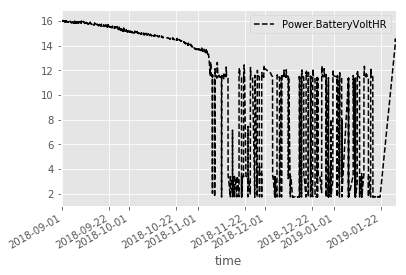

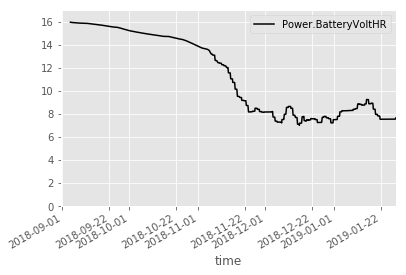

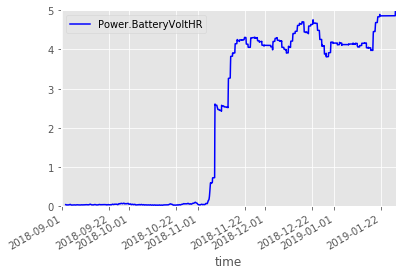

In [116]:
mean_window = 2048
std_window = 1024
plot_data(data, mean_window, std_window)

## Calculate rolling average and rolling standard deviation

In [117]:
anomaly_threshold = 0.4
data = add_stats(data, mean_window, std_window, anomaly_threshold)

In [118]:
n_anomalies = get_nr_anomalies(data)

Nr of 'anomalies': 7304


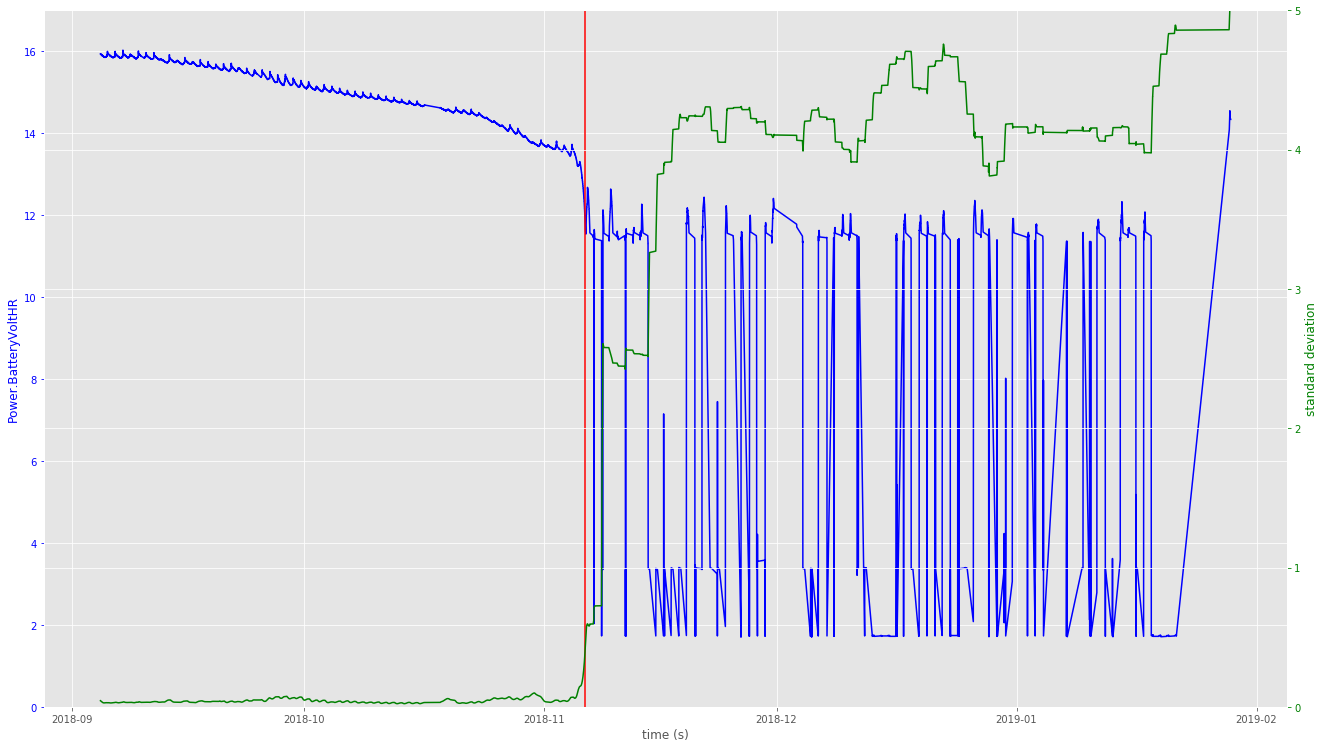

<Figure size 1080x720 with 0 Axes>

In [119]:
plot_anomalies(data,1)

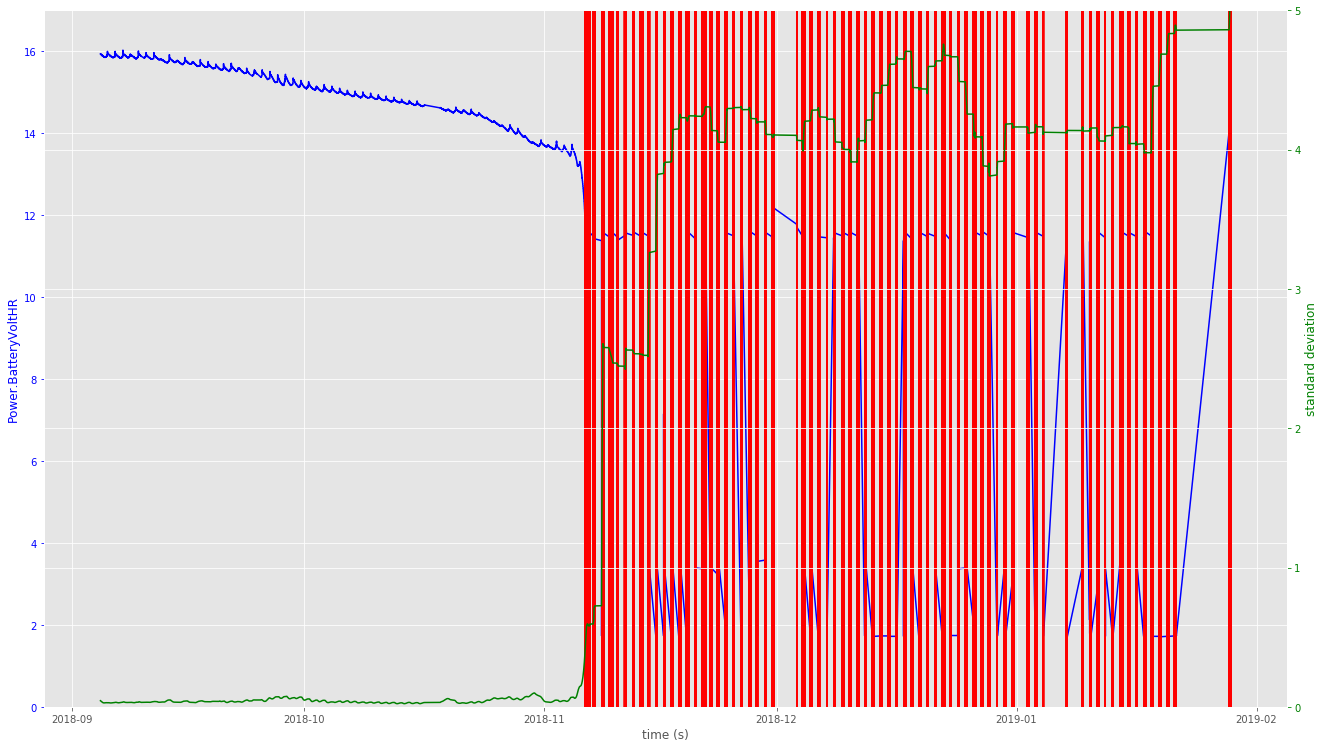

<Figure size 1080x720 with 0 Axes>

In [122]:
plot_anomalies(data)

# Checking the normal battery packs

## Battery Pack n° 2

### Load data

In [127]:
data = load_data(2)

### Plot data

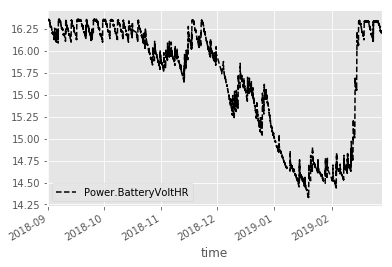

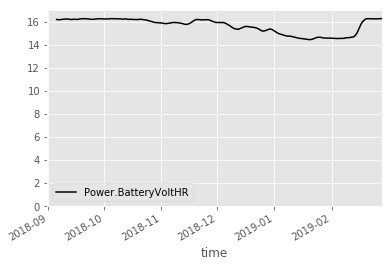

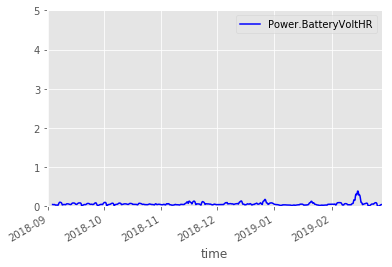

In [128]:
mean_window = 2048
std_window = 1024
plot_data(data, mean_window, std_window)

### Calculate rolling average and rolling standard deviation

In [129]:
data = add_stats(data, mean_window, std_window, anomaly_threshold)

In [130]:
n_anomalies = get_nr_anomalies(data)

Nr of 'anomalies': 0


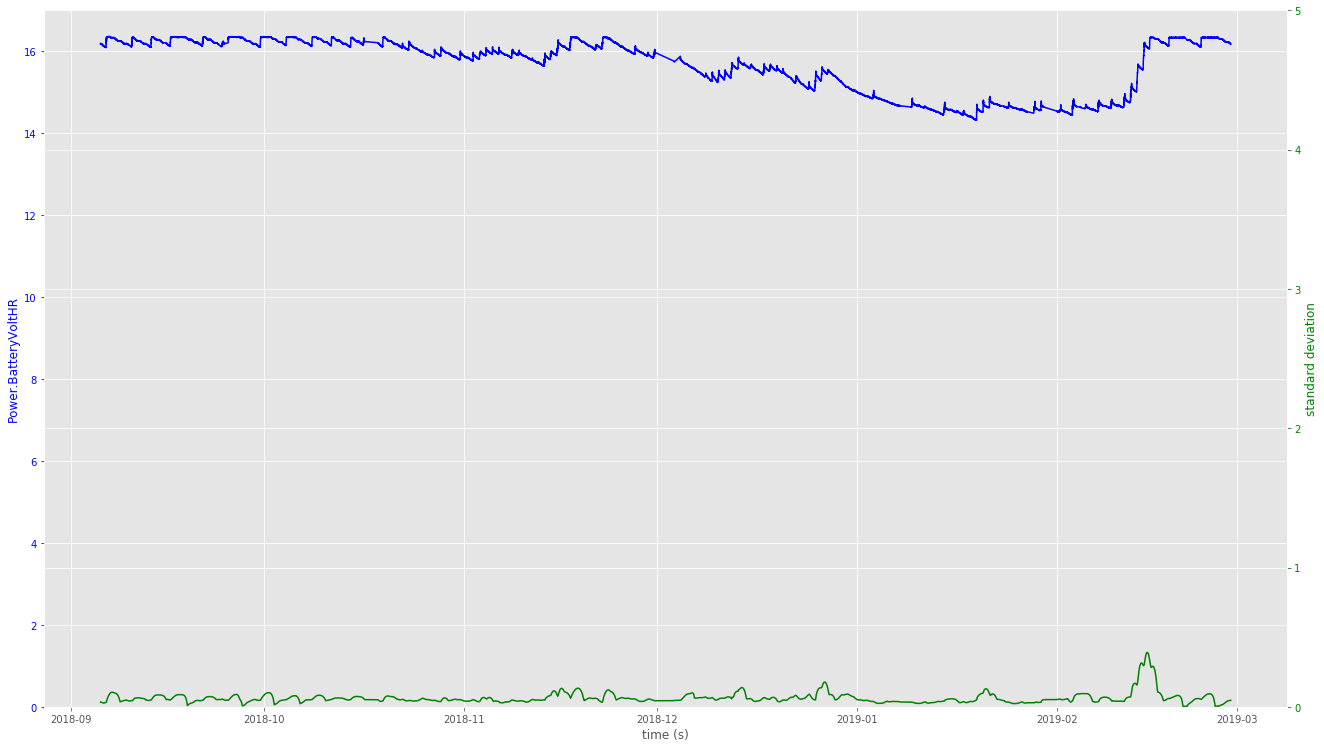

<Figure size 1080x720 with 0 Axes>

In [131]:
plot_anomalies(data,1)

## Battery Pack n° 3

### Load data

In [132]:
data = load_data(3)

### Plot data

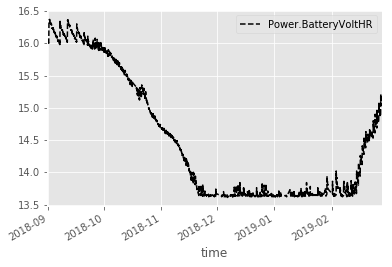

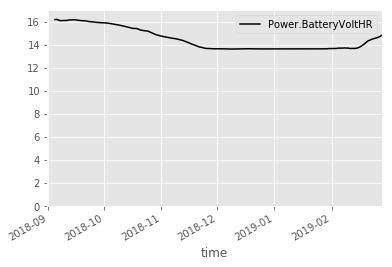

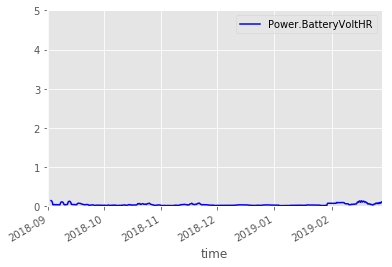

In [133]:
mean_window = 2048
std_window = 1024
plot_data(data, mean_window, std_window)

### Calculate rolling average and rolling standard deviation

In [134]:
anomaly_threshold = 0.5
data = add_stats(data, mean_window, std_window, anomaly_threshold)

In [135]:
n_anomalies = get_nr_anomalies(data)

Nr of 'anomalies': 0


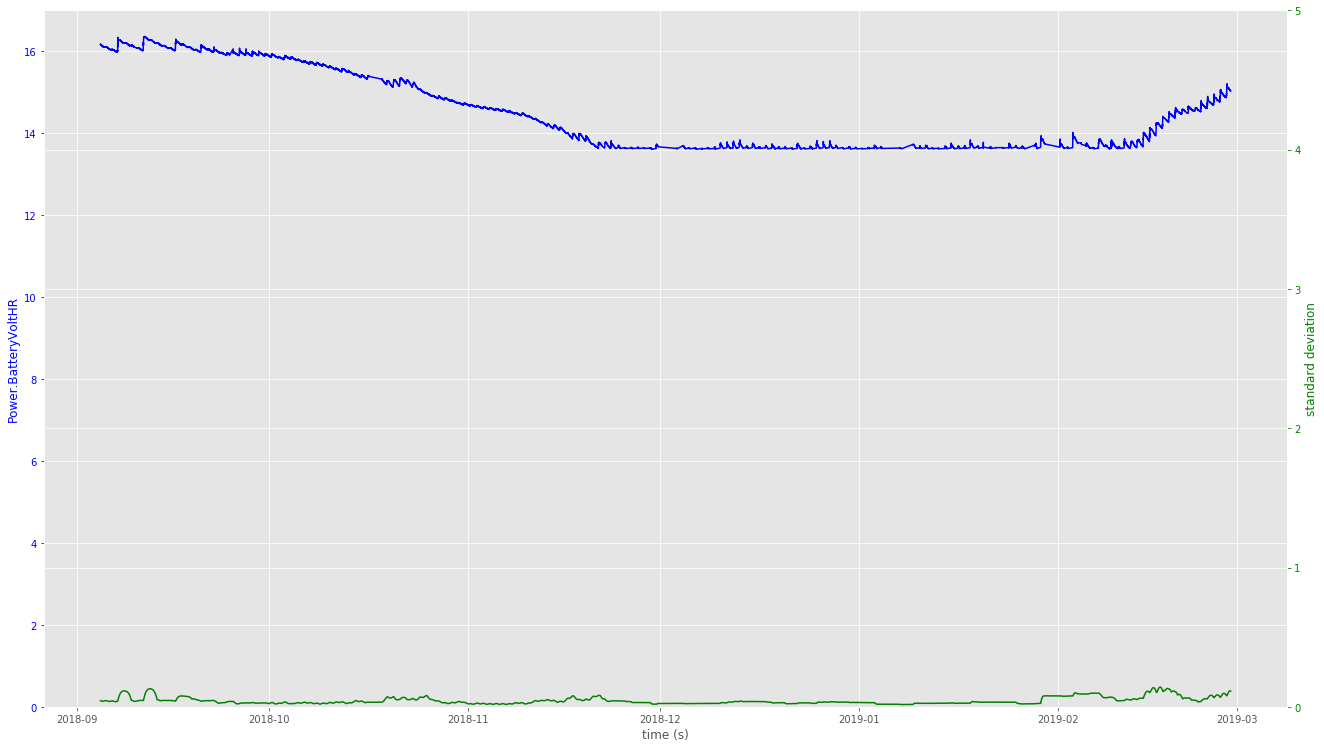

<Figure size 1080x720 with 0 Axes>

In [136]:
plot_anomalies(data)

C:\Users\JeffG\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\JeffG\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  # This is added back by InteractiveShellApp.init_path()


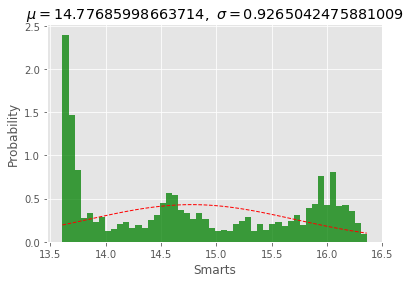

In [112]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

x = data['Power.BatteryVoltHR']

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='green', alpha=0.75)

# add a 'best fit' line
y = mlab.normpdf( bins, x.mean() , x.std())
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('$\mu={0},\ \sigma={1}$'.format(x.mean() , x.std()))
plt.grid(True)

plt.show()

# Low-Pass Filtering
Interesting websites:
 * https://www.datascience.com/blog/python-anomaly-detection
 * http://www.hamilton.ie/florian/infocom2008.pdf (paper

In [89]:
def moving_average(data, window_size):
    """ Computes moving average using discrete linear convolution of two one dimensional sequences.
    Args:
    -----
            data (pandas.Series): independent variable
            window_size (int): rolling window size

    Returns:
    --------
            ndarray of linear convolution

    References:
    ------------
    [1] Wikipedia, "Convolution", http://en.wikipedia.org/wiki/Convolution.
    [2] API Reference: https://docs.scipy.org/doc/numpy/reference/generated/numpy.convolve.html

    """
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(data, window, 'same')


def explain_anomalies(y, window_size, sigma=1.0):
    """ Helps in exploring the anamolies using stationary standard deviation
    Args:
    -----
        y (pandas.Series): independent variable
        window_size (int): rolling window size
        sigma (int): value for standard deviation

    Returns:
    --------
        a dict (dict of 'standard_deviation': int, 'anomalies_dict': (index: value))
        containing information about the points indentified as anomalies

    """
#     avg = moving_average(y, window_size).tolist()
    avg = y.rolling(window_size).mean().tolist()
    residual = y - avg
    # Calculate the variation in the distribution of the residual
    std = np.std(residual)
    return {'standard_deviation': round(std, 3),
            'anomalies_dict': collections.OrderedDict([(index, y_i) for
                                                       index, y_i, avg_i in zip(count(), 
                                                                                y[int(window_size/2):int(-window_size/2)], 
                                                                                avg[int(window_size/2):int(-window_size/2)])
              if (y_i > avg_i + (sigma*std)) | (y_i < avg_i - (sigma*std))])}


def explain_anomalies_rolling_std(y, window_size, sigma=1.0):
    """ Helps in exploring the anamolies using rolling standard deviation
    Args:
    -----
        y (pandas.Series): independent variable
        window_size (int): rolling window size
        sigma (int): value for standard deviation

    Returns:
    --------
        a dict (dict of 'standard_deviation': int, 'anomalies_dict': (index: value))
        containing information about the points indentified as anomalies
    """
#     avg = moving_average(y, window_size)
    avg = y.rolling(window_size).mean()
    avg_list = avg.tolist()
    residual = y - avg
    # Calculate the variation in the distribution of the residual
    testing_std = residual.rolling(window_size).std()
#     pd.rolling_std(residual, window_size)
    testing_std_as_df = pd.DataFrame(testing_std)
    rolling_std = testing_std_as_df.replace(np.nan,
                                  testing_std_as_df.ix[window_size - 1]).round(3).iloc[:,0].tolist()
    std = np.std(residual)
    return {'stationary standard_deviation': round(std, 3),
            'anomalies_dict': collections.OrderedDict([(index, y_i)
                                                       for index, y_i, avg_i, rs_i in zip(count(),
                                                                                           y, avg_list, rolling_std)
              if (y_i > avg_i + (sigma * rs_i)) | (y_i < avg_i - (sigma * rs_i))])}


# This function is repsonsible for displaying how the function performs on the given dataset.
def plot_results(x, y, window_size, sigma_value=1,
                 text_xlabel="X Axis", text_ylabel="Y Axis", applying_rolling_std=False):
    """ Helps in generating the plot and flagging the anamolies.
        Supports both moving and stationary standard deviation. Use the 'applying_rolling_std' to switch
        between the two.
    Args:
    -----
        x (pandas.Series): dependent variable
        y (pandas.Series): independent variable
        window_size (int): rolling window size
        sigma_value (int): value for standard deviation
        text_xlabel (str): label for annotating the X Axis
        text_ylabel (str): label for annotatin the Y Axis
        applying_rolling_std (boolean): True/False for using rolling vs stationary standard deviation
    """
    plt.figure(figsize=(15, 8))
    plt.plot(x, y, "k.")
#     y_av = moving_average(y, window_size)
    y_av = y.rolling(window_size).mean()
    plt.plot(x[int(window_size/2):int(-window_size/2)], y_av[int(window_size/2):int(-window_size/2)], color='green')
    plt.xlabel(text_xlabel)
    plt.ylabel(text_ylabel)
#     plt.xlim((29000,37000))

    # Query for the anomalies and plot the same
    events = {}
    if applying_rolling_std:
        events = explain_anomalies_rolling_std(y, window_size=window_size, sigma=sigma_value)
    else:
        events = explain_anomalies(y, window_size=window_size, sigma=sigma_value)

    x_anomaly = np.fromiter(events['anomalies_dict'].keys(), dtype=int, count=len(events['anomalies_dict']))
    y_anomaly = np.fromiter(events['anomalies_dict'].values(), dtype=float,
                                            count=len(events['anomalies_dict']))
    plt.plot(x_anomaly, y_anomaly, "r*", markersize=12)

    # add grid and lines and enable the plot
    plt.grid(True)
    plt.show()

In [90]:
from itertools import count
import matplotlib.pyplot as plt
from numpy import linspace, loadtxt, ones, convolve
import numpy as np
import pandas as pd
import collections
from random import randint
from matplotlib import style

In [92]:
data = load_data(1)

In [93]:
# 4. Lets play with the functions
x = pd.Series(range(0,len(data['Power.BatteryVoltHR'].values)))
Y = pd.Series(data['Power.BatteryVoltHR'].values)

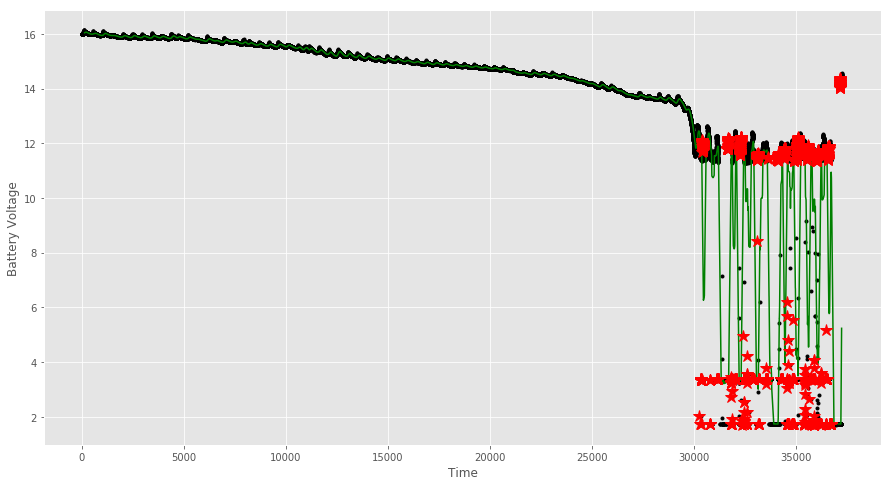

In [94]:
# plot the results using non-rolling average
window_size = 128
sigma = 3
plot_results(x, y=Y, window_size=window_size, text_xlabel="Time", sigma_value=sigma,
             text_ylabel="Battery Voltage", applying_rolling_std=False)
events = explain_anomalies(y=Y, window_size=window_size, sigma=sigma)
# events = explain_anomalies_rolling_std(y=Y, window_size=10, sigma=3)

# Display the anomaly dict
# print("Information about the anomalies model:{}".format(events))

In [72]:
len(events['anomalies_dict'])

1188

C:\Users\JeffG\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:69: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


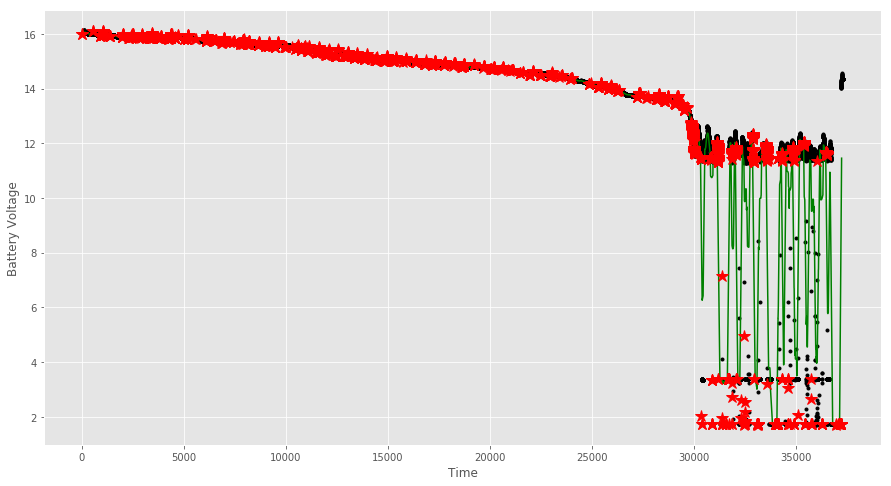

In [88]:
# plot the results using non-rolling average
window_size = 128
sigma = 3
plot_results(x, y=Y, window_size=window_size, text_xlabel="Time", sigma_value=sigma,
             text_ylabel="Battery Voltage", applying_rolling_std=True)
events = explain_anomalies_rolling_std(y=Y, window_size=window_size, sigma=sigma)